In [20]:
import numpy as np
import matplotlib.pyplot as plt


from keras.datasets import imdb
from keras import models
from keras import layers

In [7]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [8]:
def decode_review(review):
    offsetChars = 3
    dictionary = imdb.get_word_index()
    decoded_dictionary = dict([(value, key) for (key, value) in dictionary.items()])
    return ''.join([decoded_dictionary.get(i - offsetChars, '?') for i in train_data[0]])

In [15]:
def one_hot_encode(review, dimension = 10000):
    encoded = np.zeros(dimension)
    for i, word in enumerate(review):
        encoded[word] = True
    return encoded
        

def vectorize_sequences(reviews, dimension = 10000):
    vectorized = np.zeros((len(reviews), dimension))
    for i, review in enumerate(reviews):
        vectorized[i] = one_hot_encode(review, dimension)        
    return vectorized


X_train         = vectorize_sequences(train_data)
X_test          = vectorize_sequences(test_data)

y_train         = np.asarray(train_labels).astype('float32')
y_test          = np.asarray(test_labels).astype('float32')

X_val           = X_train[:10000]
y_val           = y_train[:10000]

partial_X_train = X_train[10000:]
partial_Y_train = y_train[10000:]

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    partial_X_train,
    partial_Y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
  512/15000 [>.............................] - ETA: 5s - loss: 0.6929 - acc: 0.5215

 1024/15000 [=>............................] - ETA: 3s - loss: 0.6903 - acc: 0.5312

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.6817 - acc: 0.5944

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.6718 - acc: 0.6411

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.6662 - acc: 0.6320

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.6592 - acc: 0.6481

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.6513 - acc: 0.6688

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.6440 - acc: 0.6819

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.6359 - acc: 0.7001



 5120/15000 [=========>....................] - ETA: 1s - loss: 0.6291 - acc: 0.7102



 5632/15000 [==========>...................] - ETA: 1s - loss: 0.6232 - acc: 0.7191

 6656/15000 [============>.................] - ETA: 1s - loss: 0.6143 - acc: 0.7278

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.6049 - acc: 0.7406

 8704/15000 [================>.............] - ETA: 0s - loss: 0.5935 - acc: 0.7511

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.5836 - acc: 0.7605

10240/15000 [===================>..........] - ETA: 0s - loss: 0.5790 - acc: 0.7649

11264/15000 [=====================>........] - ETA: 0s - loss: 0.5692 - acc: 0.7745

12288/15000 [=======================>......] - ETA: 0s - loss: 0.5605 - acc: 0.7821

13312/15000 [=========================>....] - ETA: 0s - loss: 0.5533 - acc: 0.7873

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5467 - acc: 0.7910

15000/15000 [==============================] - 3s 174us/step - loss: 0.5415 - acc: 0.7949 - val_loss: 0.4226 - val_acc: 0.8649


Epoch 2/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.3682 - acc: 0.9160

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.3764 - acc: 0.9134

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.3737 - acc: 0.9098

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3739 - acc: 0.9026

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.3716 - acc: 0.9023

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.3667 - acc: 0.9020

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3641 - acc: 0.9007

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.3626 - acc: 0.8991

 8704/15000 [================>.............] - ETA: 0s - loss: 0.3568 - acc: 0.9007

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3565 - acc: 0.9003

10752/15000 [====================>.........] - ETA: 0s - loss: 0.3527 - acc: 0.9009

11776/15000 [======================>.......] - ETA: 0s - loss: 0.3509 - acc: 0.8996

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3491 - acc: 0.8981

13824/15000 [==========================>...] - ETA: 0s - loss: 0.3453 - acc: 0.8992

14848/15000 [============================>.] - ETA: 0s - loss: 0.3431 - acc: 0.8992

15000/15000 [==============================] - 2s 121us/step - loss: 0.3428 - acc: 0.8991 - val_loss: 0.3304 - val_acc: 0.8875


Epoch 3/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.2789 - acc: 0.9395

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.2656 - acc: 0.9368

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.2646 - acc: 0.9332

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2607 - acc: 0.9314

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2607 - acc: 0.9314

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2605 - acc: 0.9292

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2576 - acc: 0.9291

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2564 - acc: 0.9289

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2559 - acc: 0.9276

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2584 - acc: 0.9245

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2576 - acc: 0.9239

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2570 - acc: 0.9232

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2547 - acc: 0.9238

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2514 - acc: 0.9257

14848/15000 [============================>.] - ETA: 0s - loss: 0.2498 - acc: 0.9256

15000/15000 [==============================] - 2s 120us/step - loss: 0.2498 - acc: 0.9253 - val_loss: 0.2960 - val_acc: 0.8847


Epoch 4/20
  512/15000 [>.............................] - ETA: 0s - loss: 0.2095 - acc: 0.9375

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.2003 - acc: 0.9440

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1994 - acc: 0.9461

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2023 - acc: 0.9425

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2016 - acc: 0.9408

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1982 - acc: 0.9421

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1955 - acc: 0.9446

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1962 - acc: 0.9440

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1980 - acc: 0.9418

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1967 - acc: 0.9413

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1953 - acc: 0.9411

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1937 - acc: 0.9414

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1953 - acc: 0.9399

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1948 - acc: 0.9396

14848/15000 [============================>.] - ETA: 0s - loss: 0.1940 - acc: 0.9397

15000/15000 [==============================] - 2s 115us/step - loss: 0.1943 - acc: 0.9395 - val_loss: 0.2878 - val_acc: 0.8850


Epoch 5/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1552 - acc: 0.9570

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1627 - acc: 0.9577

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1618 - acc: 0.9563

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1603 - acc: 0.9534

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1609 - acc: 0.9531

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1582 - acc: 0.9542

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1572 - acc: 0.9548

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1584 - acc: 0.9538

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1595 - acc: 0.9516

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1595 - acc: 0.9516

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1587 - acc: 0.9517

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1583 - acc: 0.9519

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1586 - acc: 0.9513

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1587 - acc: 0.9505

14848/15000 [============================>.] - ETA: 0s - loss: 0.1592 - acc: 0.9499

15000/15000 [==============================] - 2s 122us/step - loss: 0.1588 - acc: 0.9502 - val_loss: 0.2752 - val_acc: 0.8907


Epoch 6/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1239 - acc: 0.9590

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1217 - acc: 0.9668

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1251 - acc: 0.9652

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1205 - acc: 0.9679

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1213 - acc: 0.9657

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1237 - acc: 0.9648

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1250 - acc: 0.9644

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1265 - acc: 0.9637

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1305 - acc: 0.9622

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1297 - acc: 0.9625

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1310 - acc: 0.9610

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1301 - acc: 0.9610

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1291 - acc: 0.9615

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1286 - acc: 0.9613

14848/15000 [============================>.] - ETA: 0s - loss: 0.1293 - acc: 0.9607

15000/15000 [==============================] - 2s 121us/step - loss: 0.1291 - acc: 0.9607 - val_loss: 0.3067 - val_acc: 0.8822


Epoch 7/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1483 - acc: 0.9512

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1287 - acc: 0.9570

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.1165 - acc: 0.9625

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1146 - acc: 0.9657

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1157 - acc: 0.9651

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1132 - acc: 0.9668

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1111 - acc: 0.9675

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1109 - acc: 0.9671

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1095 - acc: 0.9683

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1086 - acc: 0.9680

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1071 - acc: 0.9688

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1078 - acc: 0.9685

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1069 - acc: 0.9688

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1074 - acc: 0.9685

14848/15000 [============================>.] - ETA: 0s - loss: 0.1067 - acc: 0.9683

15000/15000 [==============================] - 2s 121us/step - loss: 0.1068 - acc: 0.9683 - val_loss: 0.3031 - val_acc: 0.8864


Epoch 8/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0705 - acc: 0.9922

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0774 - acc: 0.9857



 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0758 - acc: 0.9855

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0781 - acc: 0.9835

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0797 - acc: 0.9813

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0834 - acc: 0.9803

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0877 - acc: 0.9776

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0878 - acc: 0.9768

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0876 - acc: 0.9771

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0866 - acc: 0.9774

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0861 - acc: 0.9769

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0860 - acc: 0.9771

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0868 - acc: 0.9766

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0882 - acc: 0.9755

14848/15000 [============================>.] - ETA: 0s - loss: 0.0891 - acc: 0.9748

15000/15000 [==============================] - 2s 123us/step - loss: 0.0892 - acc: 0.9747 - val_loss: 0.3155 - val_acc: 0.8846


Epoch 9/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0585 - acc: 0.9902

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0698 - acc: 0.9870

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0674 - acc: 0.9867

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0671 - acc: 0.9855

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0683 - acc: 0.9852

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0690 - acc: 0.9844

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0701 - acc: 0.9832

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0689 - acc: 0.9832

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0706 - acc: 0.9828

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0697 - acc: 0.9831

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0715 - acc: 0.9821

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0741 - acc: 0.9806

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0735 - acc: 0.9806

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0738 - acc: 0.9803

14848/15000 [============================>.] - ETA: 0s - loss: 0.0739 - acc: 0.9803

15000/15000 [==============================] - 2s 126us/step - loss: 0.0737 - acc: 0.9805 - val_loss: 0.3376 - val_acc: 0.8833


Epoch 10/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0570 - acc: 0.9824

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0542 - acc: 0.9857

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0528 - acc: 0.9875

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0547 - acc: 0.9863

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0550 - acc: 0.9863

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0547 - acc: 0.9872

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0566 - acc: 0.9860

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0581 - acc: 0.9852

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0575 - acc: 0.9855

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0577 - acc: 0.9854

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0581 - acc: 0.9854

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0590 - acc: 0.9853

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0586 - acc: 0.9858

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0603 - acc: 0.9845

14848/15000 [============================>.] - ETA: 0s - loss: 0.0615 - acc: 0.9836

15000/15000 [==============================] - 2s 121us/step - loss: 0.0617 - acc: 0.9835 - val_loss: 0.3647 - val_acc: 0.8781


Epoch 11/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0524 - acc: 0.9922

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0423 - acc: 0.9961

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0448 - acc: 0.9941

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0434 - acc: 0.9941

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0444 - acc: 0.9939

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0429 - acc: 0.9934

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0426 - acc: 0.9935

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0434 - acc: 0.9923

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0437 - acc: 0.9921

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0450 - acc: 0.9915

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0466 - acc: 0.9905

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0488 - acc: 0.9895

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0500 - acc: 0.9891

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0507 - acc: 0.9885

14848/15000 [============================>.] - ETA: 0s - loss: 0.0509 - acc: 0.9884

15000/15000 [==============================] - 2s 122us/step - loss: 0.0507 - acc: 0.9885 - val_loss: 0.3809 - val_acc: 0.8791


Epoch 12/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0379 - acc: 0.9902

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0337 - acc: 0.9948



 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0323 - acc: 0.9961

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0328 - acc: 0.9955

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0343 - acc: 0.9954

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0344 - acc: 0.9954

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0352 - acc: 0.9946

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0370 - acc: 0.9939

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0370 - acc: 0.9936

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0374 - acc: 0.9937

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0373 - acc: 0.9937

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0367 - acc: 0.9938

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0389 - acc: 0.9927

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0410 - acc: 0.9919

14848/15000 [============================>.] - ETA: 0s - loss: 0.0408 - acc: 0.9916

15000/15000 [==============================] - 2s 120us/step - loss: 0.0409 - acc: 0.9917 - val_loss: 0.4197 - val_acc: 0.8720


Epoch 13/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0331 - acc: 0.9922

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0273 - acc: 0.9961

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0285 - acc: 0.9965

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0296 - acc: 0.9958

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0286 - acc: 0.9959

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0276 - acc: 0.9964

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0274 - acc: 0.9964

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0270 - acc: 0.9965

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0271 - acc: 0.9963

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0280 - acc: 0.9958

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0280 - acc: 0.9957

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0286 - acc: 0.9956

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0293 - acc: 0.9954

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0302 - acc: 0.9949

14848/15000 [============================>.] - ETA: 0s - loss: 0.0327 - acc: 0.9935

15000/15000 [==============================] - 2s 124us/step - loss: 0.0330 - acc: 0.9933 - val_loss: 0.4579 - val_acc: 0.8677


Epoch 14/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0421 - acc: 0.9941

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0283 - acc: 0.9961

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0255 - acc: 0.9957

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0247 - acc: 0.9961

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0233 - acc: 0.9970

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0235 - acc: 0.9968

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0240 - acc: 0.9965

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0235 - acc: 0.9969

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0225 - acc: 0.9972

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0227 - acc: 0.9968

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0233 - acc: 0.9966

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0238 - acc: 0.9965

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0250 - acc: 0.9961

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0261 - acc: 0.9953

14848/15000 [============================>.] - ETA: 0s - loss: 0.0260 - acc: 0.9954

15000/15000 [==============================] - 2s 123us/step - loss: 0.0259 - acc: 0.9954 - val_loss: 0.4623 - val_acc: 0.8728


Epoch 15/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0292 - acc: 0.9941

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0218 - acc: 0.9961

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0195 - acc: 0.9973

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0190 - acc: 0.9972

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0199 - acc: 0.9972

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0198 - acc: 0.9973

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0187 - acc: 0.9976

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0188 - acc: 0.9977

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0187 - acc: 0.9978

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0187 - acc: 0.9979

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0204 - acc: 0.9967

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0226 - acc: 0.9956

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0222 - acc: 0.9956

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0219 - acc: 0.9957

14848/15000 [============================>.] - ETA: 0s - loss: 0.0217 - acc: 0.9958

15000/15000 [==============================] - 2s 124us/step - loss: 0.0217 - acc: 0.9958 - val_loss: 0.4999 - val_acc: 0.8732


Epoch 16/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0112 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0126 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0134 - acc: 0.9984

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0137 - acc: 0.9986

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0131 - acc: 0.9987

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0131 - acc: 0.9989

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0138 - acc: 0.9986

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0138 - acc: 0.9987

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0136 - acc: 0.9989

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0134 - acc: 0.9989

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0143 - acc: 0.9987

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0143 - acc: 0.9986

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0145 - acc: 0.9986

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0149 - acc: 0.9985

14848/15000 [============================>.] - ETA: 0s - loss: 0.0166 - acc: 0.9977

15000/15000 [==============================] - 2s 122us/step - loss: 0.0166 - acc: 0.9977 - val_loss: 0.5361 - val_acc: 0.8729


Epoch 17/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0076 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0098 - acc: 0.9993

 2560/15000 [====>.........................]

 - ETA: 0s - loss: 0.0097 - acc: 0.9996

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0099 - acc: 0.9997

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0095 - acc: 0.9998

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0095 - acc: 0.9995

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0097 - acc: 0.9994

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0100 - acc: 0.9992

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0103 - acc: 0.9992

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0109 - acc: 0.9991

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0111 - acc: 0.9991

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0118 - acc: 0.9990

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0126 - acc: 0.9988

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0129 - acc: 0.9987

14848/15000 [============================>.] - ETA: 0s - loss: 0.0127 - acc: 0.9987

15000/15000 [==============================] - 2s 122us/step - loss: 0.0127 - acc: 0.9987 - val_loss: 0.5575 - val_acc: 0.8698


Epoch 18/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0062 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0097 - acc: 0.9987

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0093 - acc: 0.9988

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0087 - acc: 0.9992

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0084 - acc: 0.9993

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0080 - acc: 0.9995

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0078 - acc: 0.9995

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0083 - acc: 0.9993

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0084 - acc: 0.9994

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0089 - acc: 0.9994

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0091 - acc: 0.9994

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0091 - acc: 0.9993

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0089 - acc: 0.9994

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0090 - acc: 0.9994

14848/15000 [============================>.] - ETA: 0s - loss: 0.0096 - acc: 0.9993

15000/15000 [==============================] - 2s 120us/step - loss: 0.0096 - acc: 0.9993 - val_loss: 0.6013 - val_acc: 0.8693


Epoch 19/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0055 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0090 - acc: 0.9987



 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0076 - acc: 0.9992

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0072 - acc: 0.9994

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0069 - acc: 0.9996

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0072 - acc: 0.9995

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0070 - acc: 0.9995

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0069 - acc: 0.9996

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0067 - acc: 0.9997

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0065 - acc: 0.9997

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0066 - acc: 0.9996

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0068 - acc: 0.9997

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0069 - acc: 0.9997

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0070 - acc: 0.9997

14848/15000 [============================>.] - ETA: 0s - loss: 0.0069 - acc: 0.9997

15000/15000 [==============================] - 2s 121us/step - loss: 0.0069 - acc: 0.9997 - val_loss: 0.6345 - val_acc: 0.8664


Epoch 20/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0043 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0068 - acc: 0.9993

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.0055 - acc: 0.9996

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0051 - acc: 0.9997

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0049 - acc: 0.9998

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0055 - acc: 0.9996

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0051 - acc: 0.9997

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0048 - acc: 0.9997

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.9998

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0074 - acc: 0.9989

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0076 - acc: 0.9988

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0073 - acc: 0.9989

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0072 - acc: 0.9990

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0071 - acc: 0.9990

14848/15000 [============================>.] - ETA: 0s - loss: 0.0069 - acc: 0.9991

15000/15000 [==============================] - 2s 122us/step - loss: 0.0069 - acc: 0.9991 - val_loss: 0.6703 - val_acc: 0.8676


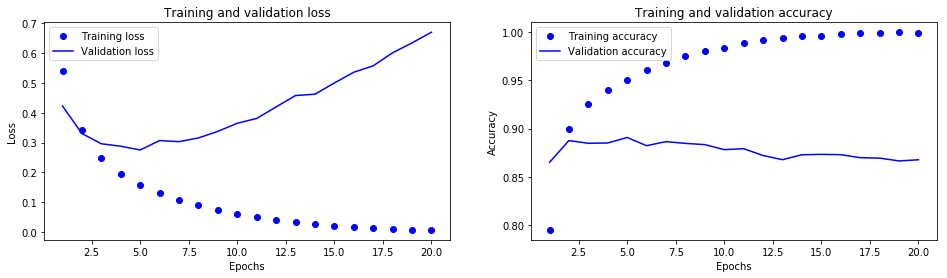

In [18]:
history_data        = history.history

train_accuracy      = history_data['acc']
train_loss          = history_data['loss']
validation_accuracy = history_data['val_acc']
validation_loss     = history_data['val_loss']

epochs              = range(1, len(history_data['acc']) + 1)


f, (left, right) = plt.subplots(1, 2)
f.set_size_inches(16,4)

left.plot(epochs, train_loss, 'bo', label='Training loss')
left.plot(epochs, validation_loss, 'b', label='Validation loss')
left.set_title('Training and validation loss')
left.set_xlabel('Epochs')
left.set_ylabel('Loss')
left.legend()

right.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
right.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
right.set_title('Training and validation accuracy')
right.set_xlabel('Epochs')
right.set_ylabel('Accuracy')
right.legend()

plt.show()


In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)
print(results)

Epoch 1/4
  512/25000 [..............................]

 - ETA: 9s - loss: 0.6923 - acc: 0.5176

 1536/25000 [>.............................] - ETA: 4s - loss: 0.6851 - acc: 0.5788

 2560/25000 [==>...........................] - ETA: 3s - loss: 0.6732 - acc: 0.5996

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.6579 - acc: 0.6339

 4608/25000 [====>.........................] - ETA: 2s - loss: 0.6430 - acc: 0.6632

 5632/25000 [=====>........................] - ETA: 2s - loss: 0.6309 - acc: 0.6855

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.6176 - acc: 0.7112

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.6050 - acc: 0.7272

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.5946 - acc: 0.7398

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.5837 - acc: 0.7517

10752/25000 [===========>..................] - ETA: 1s - loss: 0.5729 - acc: 0.7621

11776/25000 [=============>................] - ETA: 1s - loss: 0.5648 - acc: 0.7688

12800/25000 [==============>...............] - ETA: 1s - loss: 0.5552 - acc: 0.7760

13824/25000 [===============>..............] - ETA: 1s - loss: 0.5458 - acc: 0.7820

14848/25000 [================>.............] - ETA: 0s - loss: 0.5366 - acc: 0.7885

15872/25000 [==================>...........] - ETA: 0s - loss: 0.5288 - acc: 0.7937

16896/25000 [===================>..........] - ETA: 0s - loss: 0.5198 - acc: 0.7987

17920/25000 [====================>.........] - ETA: 0s - loss: 0.5136 - acc: 0.8013

18944/25000 [=====================>........] - ETA: 0s - loss: 0.5060 - acc: 0.8055

19968/25000 [======================>.......] - ETA: 0s - loss: 0.4986 - acc: 0.8095

20992/25000 [========================>.....] - ETA: 0s - loss: 0.4925 - acc: 0.8124

22016/25000 [=========================>....] - ETA: 0s - loss: 0.4855 - acc: 0.8160

23040/25000 [==========================>...] - ETA: 0s - loss: 0.4800 - acc: 0.8188

24064/25000 [===========================>..] - ETA: 0s - loss: 0.4745 - acc: 0.8217

25000/25000 [==============================] - 2s 88us/step - loss: 0.4695 - acc: 0.8242


Epoch 2/4


  512/25000 [..............................] - ETA: 1s - loss: 0.3025 - acc: 0.9023

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2886 - acc: 0.9180

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2893 - acc: 0.9109

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2925 - acc: 0.9090

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2914 - acc: 0.9065

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2953 - acc: 0.9029

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2920 - acc: 0.9047

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2883 - acc: 0.9060

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2870 - acc: 0.9071

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2879 - acc: 0.9065

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2884 - acc: 0.9052

11776/25000 [=============>................] - ETA: 1s - loss: 0.2882 - acc: 0.9050

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2857 - acc: 0.9059

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2845 - acc: 0.9059

14848/25000 [================>.............] - ETA: 0s - loss: 0.2824 - acc: 0.9065

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2805 - acc: 0.9072

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2787 - acc: 0.9078

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2774 - acc: 0.9080

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2759 - acc: 0.9081

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2749 - acc: 0.9080

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2737 - acc: 0.9083

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2728 - acc: 0.9082

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2711 - acc: 0.9088

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2698 - acc: 0.9088

25000/25000 [==============================] - 2s 81us/step - loss: 0.2688 - acc: 0.9090


Epoch 3/4


  512/25000 [..............................] - ETA: 2s - loss: 0.1987 - acc: 0.9492

 1536/25000 [>.............................] - ETA: 1s - loss: 0.2158 - acc: 0.9336

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.2110 - acc: 0.9332

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.2146 - acc: 0.9280

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.2165 - acc: 0.9258

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2145 - acc: 0.9267

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2145 - acc: 0.9265

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2160 - acc: 0.9251

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2111 - acc: 0.9278

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2119 - acc: 0.9269

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2086 - acc: 0.9285

11776/25000 [=============>................] - ETA: 1s - loss: 0.2083 - acc: 0.9287

12800/25000 [==============>...............] - ETA: 0s - loss: 0.2080 - acc: 0.9277

13824/25000 [===============>..............] - ETA: 0s - loss: 0.2063 - acc: 0.9283

14848/25000 [================>.............] - ETA: 0s - loss: 0.2058 - acc: 0.9290

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2049 - acc: 0.9294

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2051 - acc: 0.9294

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2068 - acc: 0.9282

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2078 - acc: 0.9273

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2079 - acc: 0.9268

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2086 - acc: 0.9266

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2082 - acc: 0.9270

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2083 - acc: 0.9269

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2072 - acc: 0.9274

25000/25000 [==============================] - 2s 80us/step - loss: 0.2060 - acc: 0.9278


Epoch 4/4


  512/25000 [..............................] - ETA: 1s - loss: 0.1955 - acc: 0.9297



 1536/25000 [>.............................] - ETA: 1s - loss: 0.1715 - acc: 0.9473

 2560/25000 [==>...........................] - ETA: 1s - loss: 0.1639 - acc: 0.9480

 3584/25000 [===>..........................] - ETA: 1s - loss: 0.1647 - acc: 0.9495

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.1697 - acc: 0.9468

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.1719 - acc: 0.9450

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.1716 - acc: 0.9446

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1731 - acc: 0.9441

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1742 - acc: 0.9429

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1710 - acc: 0.9448

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1697 - acc: 0.9446

11776/25000 [=============>................] - ETA: 1s - loss: 0.1695 - acc: 0.9447

12800/25000 [==============>...............] - ETA: 0s - loss: 0.1679 - acc: 0.9452

13824/25000 [===============>..............] - ETA: 0s - loss: 0.1677 - acc: 0.9450

14848/25000 [================>.............] - ETA: 0s - loss: 0.1709 - acc: 0.9431

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1712 - acc: 0.9427

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1705 - acc: 0.9431

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1708 - acc: 0.9427

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1705 - acc: 0.9428

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1705 - acc: 0.9428

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1715 - acc: 0.9421

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1716 - acc: 0.9419

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1727 - acc: 0.9413

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1729 - acc: 0.9406

25000/25000 [==============================] - 2s 80us/step - loss: 0.1728 - acc: 0.9408


   32/25000 [..............................] - ETA: 5:01

  768/25000 [..............................] - ETA: 13s 

 1536/25000 [>.............................] - ETA: 7s 

 2304/25000 [=>............................] - ETA: 5s

 3072/25000 [==>...........................] - ETA: 4s



 3840/25000 [===>..........................] - ETA: 3s

 4576/25000 [====>.........................] - ETA: 3s

 5344/25000 [=====>........................] - ETA: 2s

 6112/25000 [======>.......................] - ETA: 2s

 6880/25000 [=======>......................] - ETA: 2s

 7648/25000 [========>.....................] - ETA: 2s



 8416/25000 [=========>....................] - ETA: 1s

 9152/25000 [=========>....................] - ETA: 1s



 9920/25000 [==========>...................] - ETA: 1s



10656/25000 [===========>..................] - ETA: 1s

11424/25000 [============>.................] - ETA: 1s

12192/25000 [=============>................] - ETA: 1s

12960/25000 [==============>...............] - ETA: 1s



13728/25000 [===============>..............] - ETA: 1s

14464/25000 [================>.............] - ETA: 0s



15232/25000 [=================>............] - ETA: 0s



15968/25000 [==================>...........] - ETA: 0s



16704/25000 [===================>..........] - ETA: 0s

17440/25000 [===================>..........] - ETA: 0s

18208/25000 [====================>.........] - ETA: 0s

18976/25000 [=====================>........] - ETA: 0s



19712/25000 [======================>.......] - ETA: 0s

20448/25000 [=======================>......] - ETA: 0s

21216/25000 [========================>.....] - ETA: 0s

21984/25000 [=========================>....] - ETA: 0s

22752/25000 [==========================>...] - ETA: 0s

23520/25000 [===========================>..] - ETA: 0s

24288/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 2s 82us/step


[0.29123120592117308, 0.88419999999999999]


In [14]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)
print(results)

Epoch 1/4
  512/25000 [..............................] - ETA: 9s - loss: 0.6911 - acc: 0.5215

 1024/25000 [>.............................] - ETA: 6s - loss: 0.6848 - acc: 0.5166

 1536/25000 [>.............................] - ETA: 5s - loss: 0.6787 - acc: 0.5293

 2048/25000 [=>............................] - ETA: 4s - loss: 0.6850 - acc: 0.5146

 2560/25000 [==>...........................] - ETA: 4s - loss: 0.6837 - acc: 0.5133

 3072/25000 [==>...........................] - ETA: 3s - loss: 0.6735 - acc: 0.5420

 3584/25000 [===>..........................] - ETA: 3s - loss: 0.6602 - acc: 0.5815

 4096/25000 [===>..........................] - ETA: 3s - loss: 0.6477 - acc: 0.6018

 4608/25000 [====>.........................] - ETA: 3s - loss: 0.6426 - acc: 0.6096

 5120/25000 [=====>........................] - ETA: 3s - loss: 0.6431 - acc: 0.6098

 5632/25000 [=====>........................] - ETA: 2s - loss: 0.6351 - acc: 0.6214

 6144/25000 [======>.......................] - ETA: 2s - loss: 0.6227 - acc: 0.6372

 6656/25000 [======>.......................] - ETA: 2s - loss: 0.6092 - acc: 0.6552

 7168/25000 [=======>......................] - ETA: 2s - loss: 0.5985 - acc: 0.6682

 7680/25000 [========>.....................] - ETA: 2s - loss: 0.5871 - acc: 0.6803

 8192/25000 [========>.....................] - ETA: 2s - loss: 0.5761 - acc: 0.6912

 8704/25000 [=========>....................] - ETA: 2s - loss: 0.5694 - acc: 0.6970

 9216/25000 [==========>...................] - ETA: 2s - loss: 0.5711 - acc: 0.6959

 9728/25000 [==========>...................] - ETA: 2s - loss: 0.5705 - acc: 0.6965

10240/25000 [===========>..................] - ETA: 1s - loss: 0.5627 - acc: 0.7026

10752/25000 [===========>..................] - ETA: 1s - loss: 0.5531 - acc: 0.7108

11264/25000 [============>.................] - ETA: 1s - loss: 0.5456 - acc: 0.7178

11776/25000 [=============>................] - ETA: 1s - loss: 0.5375 - acc: 0.7248

12288/25000 [=============>................] - ETA: 1s - loss: 0.5297 - acc: 0.7312

12800/25000 [==============>...............] - ETA: 1s - loss: 0.5236 - acc: 0.7363

13312/25000 [==============>...............] - ETA: 1s - loss: 0.5187 - acc: 0.7405

13824/25000 [===============>..............] - ETA: 1s - loss: 0.5153 - acc: 0.7435

14336/25000 [================>.............] - ETA: 1s - loss: 0.5117 - acc: 0.7460

14848/25000 [================>.............] - ETA: 1s - loss: 0.5067 - acc: 0.7495

15360/25000 [=================>............] - ETA: 1s - loss: 0.5018 - acc: 0.7531

15872/25000 [==================>...........] - ETA: 1s - loss: 0.4972 - acc: 0.7560

16384/25000 [==================>...........] - ETA: 1s - loss: 0.4923 - acc: 0.7594

16896/25000 [===================>..........] - ETA: 1s - loss: 0.4878 - acc: 0.7624

17408/25000 [===================>..........] - ETA: 0s - loss: 0.4850 - acc: 0.7651

17920/25000 [====================>.........] - ETA: 0s - loss: 0.4834 - acc: 0.7665

18432/25000 [=====================>........] - ETA: 0s - loss: 0.4800 - acc: 0.7693

18944/25000 [=====================>........] - ETA: 0s - loss: 0.4762 - acc: 0.7718

19456/25000 [======================>.......] - ETA: 0s - loss: 0.4723 - acc: 0.7740

19968/25000 [======================>.......] - ETA: 0s - loss: 0.4678 - acc: 0.7767

20480/25000 [=======================>......] - ETA: 0s - loss: 0.4627 - acc: 0.7802

20992/25000 [========================>.....] - ETA: 0s - loss: 0.4591 - acc: 0.7823

21504/25000 [========================>.....] - ETA: 0s - loss: 0.4545 - acc: 0.7850

22016/25000 [=========================>....] - ETA: 0s - loss: 0.4512 - acc: 0.7867

22528/25000 [==========================>...] - ETA: 0s - loss: 0.4478 - acc: 0.7888

23040/25000 [==========================>...] - ETA: 0s - loss: 0.4463 - acc: 0.7898

23552/25000 [===========================>..] - ETA: 0s - loss: 0.4456 - acc: 0.7903

24064/25000 [===========================>..] - ETA: 0s - loss: 0.4449 - acc: 0.7914

24576/25000 [============================>.] - ETA: 0s - loss: 0.4428 - acc: 0.7930

25000/25000 [==============================] - 3s 121us/step - loss: 0.4413 - acc: 0.7940


Epoch 2/4


  512/25000 [..............................] - ETA: 2s - loss: 0.2568 - acc: 0.8945

 1024/25000 [>.............................] - ETA: 2s - loss: 0.2402 - acc: 0.9150

 1536/25000 [>.............................] - ETA: 2s - loss: 0.2257 - acc: 0.9232

 2048/25000 [=>............................] - ETA: 2s - loss: 0.2270 - acc: 0.9214

 2560/25000 [==>...........................] - ETA: 2s - loss: 0.2244 - acc: 0.9211

 3072/25000 [==>...........................] - ETA: 2s - loss: 0.2192 - acc: 0.9225

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.2212 - acc: 0.9202

 4096/25000 [===>..........................] - ETA: 2s - loss: 0.2194 - acc: 0.9194

 4608/25000 [====>.........................] - ETA: 2s - loss: 0.2189 - acc: 0.9195

 5120/25000 [=====>........................] - ETA: 2s - loss: 0.2204 - acc: 0.9197

 5632/25000 [=====>........................] - ETA: 2s - loss: 0.2205 - acc: 0.9194

 6144/25000 [======>.......................] - ETA: 2s - loss: 0.2210 - acc: 0.9188

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2297 - acc: 0.9136

 7168/25000 [=======>......................] - ETA: 1s - loss: 0.2415 - acc: 0.9076

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2492 - acc: 0.9044

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2447 - acc: 0.9064

 9216/25000 [==========>...................] - ETA: 1s - loss: 0.2449 - acc: 0.9067

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2430 - acc: 0.9075

10240/25000 [===========>..................] - ETA: 1s - loss: 0.2411 - acc: 0.9083

11264/25000 [============>.................] - ETA: 1s - loss: 0.2380 - acc: 0.9101

11776/25000 [=============>................] - ETA: 1s - loss: 0.2363 - acc: 0.9104

12800/25000 [==============>...............] - ETA: 1s - loss: 0.2321 - acc: 0.9119

13312/25000 [==============>...............] - ETA: 1s - loss: 0.2314 - acc: 0.9123

13824/25000 [===============>..............] - ETA: 1s - loss: 0.2315 - acc: 0.9125

14336/25000 [================>.............] - ETA: 1s - loss: 0.2334 - acc: 0.9117



14848/25000 [================>.............] - ETA: 1s - loss: 0.2353 - acc: 0.9108

15360/25000 [=================>............] - ETA: 0s - loss: 0.2359 - acc: 0.9102

15872/25000 [==================>...........] - ETA: 0s - loss: 0.2360 - acc: 0.9099

16384/25000 [==================>...........] - ETA: 0s - loss: 0.2356 - acc: 0.9105

16896/25000 [===================>..........] - ETA: 0s - loss: 0.2347 - acc: 0.9107

17408/25000 [===================>..........] - ETA: 0s - loss: 0.2341 - acc: 0.9108

17920/25000 [====================>.........] - ETA: 0s - loss: 0.2337 - acc: 0.9110

18432/25000 [=====================>........] - ETA: 0s - loss: 0.2354 - acc: 0.9102

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2360 - acc: 0.9092

19456/25000 [======================>.......] - ETA: 0s - loss: 0.2360 - acc: 0.9087

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2363 - acc: 0.9085

20480/25000 [=======================>......] - ETA: 0s - loss: 0.2351 - acc: 0.9089

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2352 - acc: 0.9089

21504/25000 [========================>.....] - ETA: 0s - loss: 0.2348 - acc: 0.9092

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2335 - acc: 0.9099

22528/25000 [==========================>...] - ETA: 0s - loss: 0.2332 - acc: 0.9098

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2339 - acc: 0.9097

23552/25000 [===========================>..] - ETA: 0s - loss: 0.2343 - acc: 0.9093

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2342 - acc: 0.9093

24576/25000 [============================>.] - ETA: 0s - loss: 0.2351 - acc: 0.9089

25000/25000 [==============================] - 3s 105us/step - loss: 0.2349 - acc: 0.9088


Epoch 3/4


  512/25000 [..............................] - ETA: 2s - loss: 0.1968 - acc: 0.9258

 1024/25000 [>.............................] - ETA: 2s - loss: 0.1878 - acc: 0.9277

 1536/25000 [>.............................] - ETA: 2s - loss: 0.1793 - acc: 0.9336

 2048/25000 [=>............................] - ETA: 2s - loss: 0.1665 - acc: 0.9390

 2560/25000 [==>...........................] - ETA: 2s - loss: 0.1625 - acc: 0.9402

 3072/25000 [==>...........................] - ETA: 2s - loss: 0.1564 - acc: 0.9450

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.1530 - acc: 0.9459

 4096/25000 [===>..........................] - ETA: 2s - loss: 0.1542 - acc: 0.9441

 4608/25000 [====>.........................] - ETA: 2s - loss: 0.1567 - acc: 0.9416

 5120/25000 [=====>........................] - ETA: 2s - loss: 0.1790 - acc: 0.9316

 5632/25000 [=====>........................] - ETA: 2s - loss: 0.1996 - acc: 0.9224

 6144/25000 [======>.......................] - ETA: 2s - loss: 0.2007 - acc: 0.9227

 6656/25000 [======>.......................] - ETA: 2s - loss: 0.1964 - acc: 0.9249

 7168/25000 [=======>......................] - ETA: 1s - loss: 0.1943 - acc: 0.9255

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1913 - acc: 0.9266

 8192/25000 [========>.....................] - ETA: 1s - loss: 0.1925 - acc: 0.9269

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1901 - acc: 0.9288

 9216/25000 [==========>...................] - ETA: 1s - loss: 0.1872 - acc: 0.9301

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1863 - acc: 0.9305

10240/25000 [===========>..................] - ETA: 1s - loss: 0.1862 - acc: 0.9303

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1853 - acc: 0.9303

11264/25000 [============>.................] - ETA: 1s - loss: 0.1831 - acc: 0.9311

11776/25000 [=============>................] - ETA: 1s - loss: 0.1820 - acc: 0.9314

12288/25000 [=============>................] - ETA: 1s - loss: 0.1807 - acc: 0.9318

12800/25000 [==============>...............] - ETA: 1s - loss: 0.1783 - acc: 0.9328

13312/25000 [==============>...............] - ETA: 1s - loss: 0.1773 - acc: 0.9332

13824/25000 [===============>..............] - ETA: 1s - loss: 0.1763 - acc: 0.9337

14336/25000 [================>.............] - ETA: 1s - loss: 0.1743 - acc: 0.9344

14848/25000 [================>.............] - ETA: 1s - loss: 0.1743 - acc: 0.9344

15360/25000 [=================>............] - ETA: 1s - loss: 0.1726 - acc: 0.9352

15872/25000 [==================>...........] - ETA: 0s - loss: 0.1727 - acc: 0.9350

16384/25000 [==================>...........] - ETA: 0s - loss: 0.1720 - acc: 0.9352

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1737 - acc: 0.9343

17408/25000 [===================>..........] - ETA: 0s - loss: 0.1759 - acc: 0.9337

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1806 - acc: 0.9314

18432/25000 [=====================>........] - ETA: 0s - loss: 0.1843 - acc: 0.9297

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1848 - acc: 0.9295

19456/25000 [======================>.......] - ETA: 0s - loss: 0.1855 - acc: 0.9292

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1845 - acc: 0.9299

20480/25000 [=======================>......] - ETA: 0s - loss: 0.1831 - acc: 0.9305

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1820 - acc: 0.9309

21504/25000 [========================>.....] - ETA: 0s - loss: 0.1809 - acc: 0.9312

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1804 - acc: 0.9313

22528/25000 [==========================>...] - ETA: 0s - loss: 0.1804 - acc: 0.9315

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1800 - acc: 0.9316

23552/25000 [===========================>..] - ETA: 0s - loss: 0.1793 - acc: 0.9320

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1788 - acc: 0.9320

24576/25000 [============================>.] - ETA: 0s - loss: 0.1794 - acc: 0.9318

25000/25000 [==============================] - 3s 108us/step - loss: 0.1819 - acc: 0.9306


Epoch 4/4


  512/25000 [..............................] - ETA: 2s - loss: 0.2554 - acc: 0.8828

 1024/25000 [>.............................] - ETA: 2s - loss: 0.1907 - acc: 0.9258

 1536/25000 [>.............................] - ETA: 2s - loss: 0.1745 - acc: 0.9323

 2048/25000 [=>............................] - ETA: 2s - loss: 0.1616 - acc: 0.9385

 2560/25000 [==>...........................] - ETA: 2s - loss: 0.1548 - acc: 0.9406

 3072/25000 [==>...........................] - ETA: 2s - loss: 0.1459 - acc: 0.9460

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.1383 - acc: 0.9498

 4096/25000 [===>..........................] - ETA: 2s - loss: 0.1342 - acc: 0.9519

 4608/25000 [====>.........................] - ETA: 2s - loss: 0.1318 - acc: 0.9514

 5120/25000 [=====>........................] - ETA: 2s - loss: 0.1302 - acc: 0.9520

 5632/25000 [=====>........................] - ETA: 2s - loss: 0.1292 - acc: 0.9515

 6144/25000 [======>.......................] - ETA: 2s - loss: 0.1272 - acc: 0.9521

 6656/25000 [======>.......................] - ETA: 2s - loss: 0.1304 - acc: 0.9507

 7168/25000 [=======>......................] - ETA: 2s - loss: 0.1337 - acc: 0.9494

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.1346 - acc: 0.9483

 8192/25000 [========>.....................] - ETA: 1s - loss: 0.1344 - acc: 0.9482

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.1342 - acc: 0.9485

 9216/25000 [==========>...................] - ETA: 1s - loss: 0.1343 - acc: 0.9482

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.1373 - acc: 0.9469

10240/25000 [===========>..................] - ETA: 1s - loss: 0.1356 - acc: 0.9480

10752/25000 [===========>..................] - ETA: 1s - loss: 0.1347 - acc: 0.9487

11264/25000 [============>.................] - ETA: 1s - loss: 0.1339 - acc: 0.9492

11776/25000 [=============>................] - ETA: 1s - loss: 0.1330 - acc: 0.9498

12288/25000 [=============>................] - ETA: 1s - loss: 0.1335 - acc: 0.9496

12800/25000 [==============>...............] - ETA: 1s - loss: 0.1344 - acc: 0.9492

13312/25000 [==============>...............] - ETA: 1s - loss: 0.1365 - acc: 0.9479

13824/25000 [===============>..............] - ETA: 1s - loss: 0.1384 - acc: 0.9469

14336/25000 [================>.............] - ETA: 1s - loss: 0.1402 - acc: 0.9463

14848/25000 [================>.............] - ETA: 1s - loss: 0.1412 - acc: 0.9458

15360/25000 [=================>............] - ETA: 1s - loss: 0.1412 - acc: 0.9458

15872/25000 [==================>...........] - ETA: 1s - loss: 0.1402 - acc: 0.9462

16384/25000 [==================>...........] - ETA: 0s - loss: 0.1399 - acc: 0.9462

16896/25000 [===================>..........] - ETA: 0s - loss: 0.1394 - acc: 0.9464

17408/25000 [===================>..........] - ETA: 0s - loss: 0.1396 - acc: 0.9462

17920/25000 [====================>.........] - ETA: 0s - loss: 0.1398 - acc: 0.9463

18432/25000 [=====================>........] - ETA: 0s - loss: 0.1400 - acc: 0.9463

18944/25000 [=====================>........] - ETA: 0s - loss: 0.1393 - acc: 0.9467

19456/25000 [======================>.......] - ETA: 0s - loss: 0.1390 - acc: 0.9467

19968/25000 [======================>.......] - ETA: 0s - loss: 0.1392 - acc: 0.9465

20480/25000 [=======================>......] - ETA: 0s - loss: 0.1395 - acc: 0.9464

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1401 - acc: 0.9462

21504/25000 [========================>.....] - ETA: 0s - loss: 0.1404 - acc: 0.9459

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1405 - acc: 0.9460

22528/25000 [==========================>...] - ETA: 0s - loss: 0.1406 - acc: 0.9461

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1404 - acc: 0.9462

23552/25000 [===========================>..] - ETA: 0s - loss: 0.1408 - acc: 0.9459

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1410 - acc: 0.9456

24576/25000 [============================>.] - ETA: 0s - loss: 0.1413 - acc: 0.9456

25000/25000 [==============================] - 3s 109us/step - loss: 0.1414 - acc: 0.9455


   32/25000 [..............................] - ETA: 32s

  480/25000 [..............................] - ETA: 4s 

  896/25000 [>.............................] - ETA: 4s

 1248/25000 [>.............................] - ETA: 3s

 1664/25000 [>.............................] - ETA: 3s

 2080/25000 [=>............................] - ETA: 3s

 2496/25000 [=>............................] - ETA: 3s

 2912/25000 [==>...........................] - ETA: 3s

 3328/25000 [==>...........................] - ETA: 3s

 3744/25000 [===>..........................] - ETA: 2s

 4160/25000 [===>..........................] - ETA: 2s

 4576/25000 [====>.........................] - ETA: 2s

 4992/25000 [====>.........................] - ETA: 2s

 5408/25000 [=====>........................] - ETA: 2s

 5824/25000 [=====>........................] - ETA: 2s

 6240/25000 [======>.......................] - ETA: 2s



 6656/25000 [======>.......................] - ETA: 2s

 7072/25000 [=======>......................] - ETA: 2s

 7488/25000 [=======>......................] - ETA: 2s

 7904/25000 [========>.....................] - ETA: 2s

 8352/25000 [=========>....................] - ETA: 2s

 8800/25000 [=========>....................] - ETA: 2s

 9248/25000 [==========>...................] - ETA: 2s

 9664/25000 [==========>...................] - ETA: 1s

10080/25000 [===========>..................] - ETA: 1s

10496/25000 [===========>..................] - ETA: 1s



10912/25000 [============>.................] - ETA: 1s

11328/25000 [============>.................] - ETA: 1s

11744/25000 [=============>................] - ETA: 1s

12192/25000 [=============>................] - ETA: 1s

12640/25000 [==============>...............] - ETA: 1s

13088/25000 [==============>...............] - ETA: 1s

13536/25000 [===============>..............] - ETA: 1s



13984/25000 [===============>..............] - ETA: 1s

14400/25000 [================>.............] - ETA: 1s

14848/25000 [================>.............] - ETA: 1s

15296/25000 [=================>............] - ETA: 1s

15712/25000 [=================>............] - ETA: 1s

16160/25000 [==================>...........] - ETA: 1s

16608/25000 [==================>...........] - ETA: 1s

17056/25000 [===================>..........] - ETA: 0s

17504/25000 [====================>.........] - ETA: 0s

17952/25000 [====================>.........] - ETA: 0s

18432/25000 [=====================>........] - ETA: 0s

18912/25000 [=====================>........] - ETA: 0s

19392/25000 [======================>.......] - ETA: 0s

19840/25000 [======================>.......] - ETA: 0s

20320/25000 [=======================>......] - ETA: 0s

20800/25000 [=======================>......] - ETA: 0s

21280/25000 [========================>.....] - ETA: 0s

21728/25000 [=========================>....] - ETA: 0s

22144/25000 [=========================>....] - ETA: 0s

22592/25000 [==========================>...] - ETA: 0s

23072/25000 [==========================>...] - ETA: 0s

23520/25000 [===========================>..] - ETA: 0s

23936/25000 [===========================>..] - ETA: 0s

24352/25000 [============================>.] - ETA: 0s

24768/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 3s 121us/step


[0.32876461295604703, 0.87644]
